In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [99]:
#Load the dataset
data = pd.read_csv('creditcard.csv')
print('Shape: ', data.shape)

Shape:  (284807, 31)


In [100]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [102]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we need to consider the few things, these transactions are done in 2 days of time. So, 48 hours converted in to seconds(172800)
- Max time is very near to 2days seconds 172792
- average transaction amout made is 284807
- highest transaction amount made is 25691
- here we can see that 75% of transactions are made under 78 dollars

In [103]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [104]:
fraud_count = data['Class'].value_counts()
print(fraud_count)

Class
0    284315
1       492
Name: count, dtype: int64


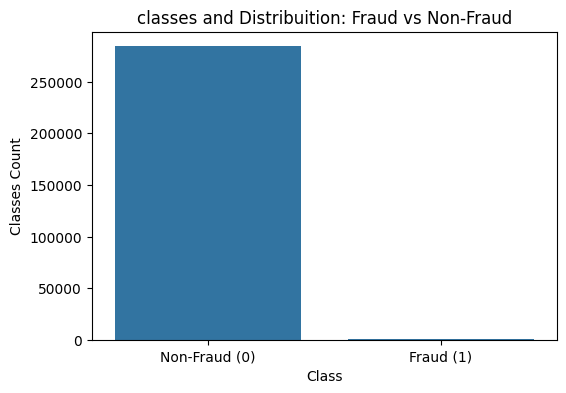

In [105]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_count.index, y=fraud_count.values)
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Classes Count")
plt.title('classes and Distribuition: Fraud vs Non-Fraud')
plt.show()

In [106]:
fraud_pct = data['Class'].value_counts(normalize = True)* 100
print(f"\nFraud cases: {fraud_pct[1]:.4f}%")


Fraud cases: 0.1727%


Here we can see the Fruad Cases are very less. Lessthan 0.2%

In [107]:
print(f"\nNon Fraud cases: {fraud_pct[0]:.4f}%")


Non Fraud cases: 99.8273%


In [108]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

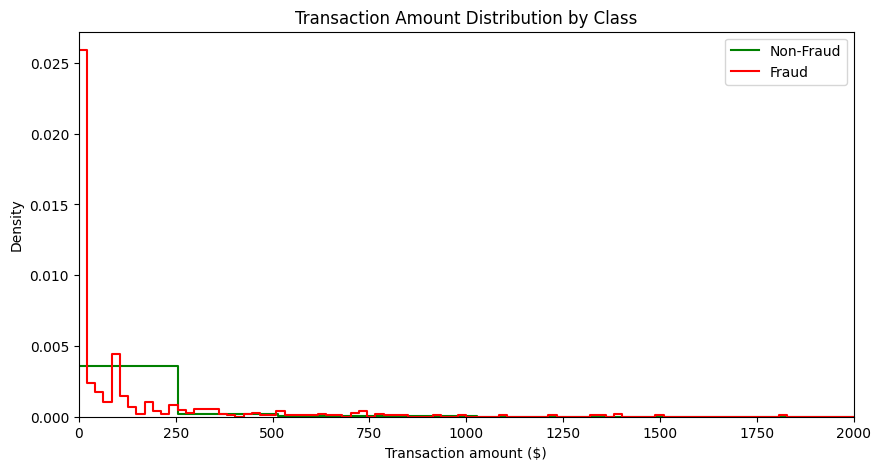

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(non_fraud['Amount'], bins = 100, color = 'green', label = 'Non-Fraud', stat = 'density', element = 'step', fill = False)
sns.histplot(fraud['Amount'], bins = 100, color = 'red', label = 'Fraud', stat = 'density', element = 'step', fill = False)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction amount ($)')
plt.xlim(0,2000)
plt.show()


- Here you can see the transaction amount follows some pattern like near to 0 or some roundoff value like 100, 500 or 750 and so on like that.
- And Non Fraud transaction are huge under 250 dollars.

In [110]:
data['Hour'] = (data['Time']//3600)%24

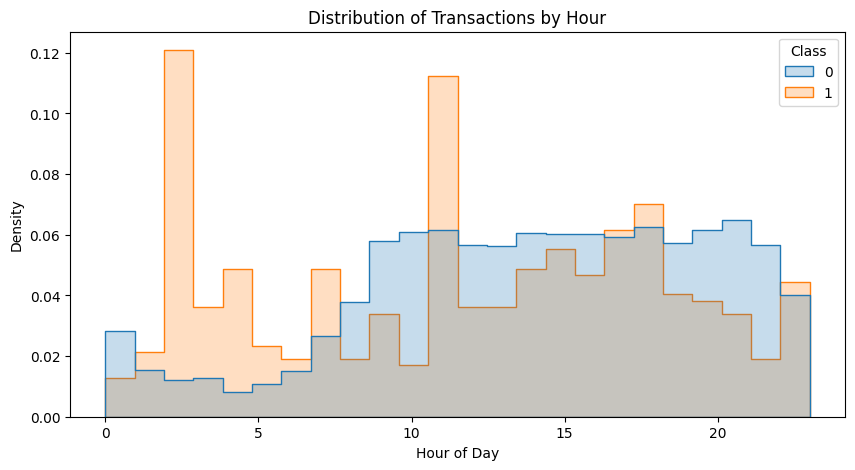

In [111]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x='Hour', hue = 'Class', bins =24, stat= 'density', element = 'step', common_norm= False)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.show()

Here you see that highest of the Fraud Transaction is around 2AM and 1AM and we can see all the times but we can see highest no of transaction at above mentioned timings.

In [112]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(284807, 32)
(283726, 32)


In [113]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size= 0.2)

In [117]:
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [118]:
X_train['Hour_sin'] = np.sin(2 * np.pi * X_train['Hour']/24)
X_train['Hour_cos'] = np.cos(2 * np.pi * X_train['Hour']/24)
X_test['Hour_sin'] = np.sin(2 * np.pi * X_test['Hour']/24)
X_test['Hour_cos'] = np.cos(2 * np.pi * X_test['Hour']/24)

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log_reg = LogisticRegression(max_iter=1000)

In [62]:
gridsearchcv_lgr = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
gridsearchcv_lgr.fit(X_train_bal, y_train_bal)
best_model_lgr = gridsearchcv_lgr.best_estimator_

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = best_model_lgr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
y_prob = best_model_lgr.predict_proba(X_test)[:,1]

In [65]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

[[55126  1525]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746

ROC AUC: 0.9668207649978771


In [66]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import precision_score, recall_score, f1_score

with mlflow.start_run():
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_params(gridsearchcv_lgr.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_prob))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))
    mlflow.sklearn.log_model(best_model_lgr, "logistic_model")

2025/08/06 08:48:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 08:48:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [67]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold

border_smote = BorderlineSMOTE(random_state=42)
X_train_brs_sample, y_train_brs_sample = border_smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {sum(y_train==1)} frauds, {sum(y_train==0)} non-frauds")
print(f"After SMOTE: {sum(y_train_brs_sample==1)} frauds, {sum(y_train_brs_sample ==0)} Non-frauds")

Before SMOTE: 378 frauds, 226602 non-frauds
After SMOTE: 226602 frauds, 226602 Non-frauds


In [68]:
lr_brs = LogisticRegression(solver = 'liblinear', class_weight= 'balanced', random_state = 42)

param_grid = {
    'C':[0.01, 0.1, 1, 10]
}

cv_brs = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
gridsearchcv_brs_lgr = GridSearchCV(lr_brs, param_grid=param_grid, cv= cv_brs, scoring='f1', verbose=1, n_jobs=-1)

gridsearchcv_brs_lgr.fit(X_train_brs_sample, y_train_brs_sample)
best_estimator_brs_lgr = gridsearchcv_brs_lgr.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [69]:
y_pred = best_estimator_brs_lgr.predict(X_test)
y_prob = best_estimator_brs_lgr.predict_proba(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()

[[56522   129]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.38      0.82      0.52        95

    accuracy                           1.00     56746
   macro avg       0.69      0.91      0.76     56746
weighted avg       1.00      1.00      1.00     56746




In [70]:
print(f"AUC_ROC_SCR: {roc_auc_score(y_test, y_pred)}")

AUC_ROC_SCR: 0.9093877657197484


In [71]:
with mlflow.start_run():
    mlflow.log_param("model", "LogisticRegressionModel with BorderLineSMOTE")
    mlflow.log_params(gridsearchcv_brs_lgr.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(best_estimator_brs_lgr, "logistic_model_with_Borderline_smote")


2025/08/06 08:49:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 08:49:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [72]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state= 42)
X_train_ads_sample, y_train_ads_sample = adasyn.fit_resample(X_train, y_train)

lr_ada = LogisticRegression(solver = 'liblinear', random_state=42)
param_grid = {
    'C':[0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=42)
gridsearch_cv_ads = GridSearchCV(lr_ada, param_grid=param_grid, cv = cv, n_jobs = -1, verbose=1, scoring='f1')
gridsearch_cv_ads.fit(X_train_ads_sample, y_train_ads_sample)
best_estimator_ads_lgr = gridsearch_cv_ads.best_estimator_

y_pred = best_estimator_ads_lgr.predict(X_test)
y_prob = best_estimator_ads_lgr.predict_proba(X_test)[:,1]


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [73]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"AUC_ROC_SCR: {roc_auc_score(y_test, y_pred)}")

[[52003  4648]
 [    8    87]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56651
           1       0.02      0.92      0.04        95

    accuracy                           0.92     56746
   macro avg       0.51      0.92      0.50     56746
weighted avg       1.00      0.92      0.96     56746

AUC_ROC_SCR: 0.9168716304538684


In [74]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

lr_smtenn = LogisticRegression(solver="liblinear", random_state = 42)

param_grid ={
    "C": [0.01, 0.1, 1, 10],
    'penalty':['l1', 'l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gridsearch_cv_smote_enn = GridSearchCV(lr_smtenn, param_grid=param_grid, cv=cv, n_jobs=-1, verbose = 1, scoring='f1')
gridsearch_cv_smote_enn.fit(X_train_smoteenn, y_train_smote_enn)
best_estimator_smote_enn = gridsearch_cv_smote_enn.best_estimator_

y_pred = best_estimator_smote_enn.predict(X_test)
y_prob = best_estimator_smote_enn.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [75]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('AUC_ROC_Score:', roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[55070  1581]
 [   12    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746

AUC_ROC_Score: 0.9664388327794651


In [76]:
with mlflow.start_run():
    mlflow.log_param("model", "LogisticRegressionModel with SMOTE-ENN")
    mlflow.log_params(gridsearch_cv_smote_enn.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(best_estimator_smote_enn, "logistic_model_with_SMOTE-ENN")


2025/08/06 09:09:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 09:09:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_blsmt = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1, 2],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gridsearch_cv_rf_bls = GridSearchCV(rf_blsmt, param_grid=param_grid, cv = skf, verbose= True, scoring='roc_auc', n_jobs=-1)
gridsearch_cv_rf_bls.fit(X_train_brs_sample, y_train_brs_sample)

best_estimator_brs_rf = gridsearch_cv_rf_bls.best_estimator_
y_pred = best_estimator_brs_rf.predict(X_test)
y_prob = best_estimator_ads_lgr.predict_proba(X_test)[:,1]


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [79]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[56611    40]
 [   23    72]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.64      0.76      0.70        95

    accuracy                           1.00     56746
   macro avg       0.82      0.88      0.85     56746
weighted avg       1.00      1.00      1.00     56746


ROC AUC Score: 0.9641293088150996


In [80]:
with mlflow.start_run():
    mlflow.log_param("model", "RandomForest")
    mlflow.log_params(gridsearch_cv_rf_bls.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(best_estimator_brs_rf, "RandomForestTree")


2025/08/06 17:37:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 17:37:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    use_label_encoder = False,
    random_state = 42,
    n_jobs = -1
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=42)

gridsearch_cv_xgb = GridSearchCV(xgb, param_grid=param_grid, cv = skf, verbose = 1, scoring = 'roc_auc', n_jobs = -1)
gridsearch_cv_xgb.fit(X_train_brs_sample, y_train_brs_sample)

best_estimator_xgb = gridsearch_cv_xgb.best_estimator_
y_pred = best_estimator_xgb.predict(X_test)
y_prob = best_estimator_xgb.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Jasweer\my_project\Credit_card_fraud_detection_system\CCFraudvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[56644     7]
 [   21    74]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


ROC AUC Score: 0.9714711218922136


In [83]:
# Try different thresholds
thresholds = np.arange(0.3, 0.6, 0.05)

print(f"{'Thresh':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'FP':<6} {'FN':<6}")
print("-" * 45)

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    cm = confusion_matrix(y_test, y_pred_thresh)
    FP = cm[0,1]
    FN = cm[1,0]
    print(f"{thresh:<8.2f} {prec:<8.2f} {rec:<8.2f} {f1:<8.2f} {FP:<6} {FN:<6}")

Thresh   Prec     Rec      F1       FP     FN    
---------------------------------------------
0.30     0.91     0.79     0.85     7      20    
0.35     0.91     0.79     0.85     7      20    
0.40     0.91     0.79     0.85     7      20    
0.45     0.91     0.78     0.84     7      21    
0.50     0.91     0.78     0.84     7      21    
0.55     0.91     0.78     0.84     7      21    


In [84]:
with mlflow.start_run():
    mlflow.log_param("model", "XGBoost")
    mlflow.log_params(gridsearch_cv_xgb.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(best_estimator_xgb, "XGBoost")

2025/08/06 18:12:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 18:12:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [85]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print("Scale_pos_weight:", scale_pos_weight)

Scale_pos_weight: 599.4761904761905


In [86]:
xgb_scale = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

In [87]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb_scale = GridSearchCV(
    estimator=xgb_scale,
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb_scale.fit(X_train, y_train)
best_estimator_xgb_scale = grid_search_xgb_scale.best_estimator_
y_pred = best_estimator_xgb_scale.predict(X_test)
y_prob = best_estimator_xgb_scale.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Jasweer\my_project\Credit_card_fraud_detection_system\CCFraudvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:25:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[56368   283]
 [   15    80]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.22      0.84      0.35        95

    accuracy                           0.99     56746
   macro avg       0.61      0.92      0.67     56746
weighted avg       1.00      0.99      1.00     56746


ROC AUC Score: 0.9759266571222321


In [88]:
y_proba_native = best_estimator_xgb_scale.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.3, 0.8, 0.05)

print(f"{'Thresh':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'FP':<6} {'FN':<6}")
print("-" * 45)

for thresh in thresholds:
    y_pred_thresh = (y_proba_native >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    cm = confusion_matrix(y_test, y_pred_thresh)
    FP = cm[0,1]
    FN = cm[1,0]
    print(f"{thresh:<8.2f} {prec:<8.2f} {rec:<8.2f} {f1:<8.2f} {FP:<6} {FN:<6}")

Thresh   Prec     Rec      F1       FP     FN    
---------------------------------------------
0.30     0.11     0.85     0.20     644    14    
0.35     0.14     0.85     0.24     511    14    
0.40     0.16     0.85     0.28     410    14    
0.45     0.20     0.85     0.32     328    14    
0.50     0.22     0.84     0.35     283    15    
0.55     0.25     0.84     0.38     243    15    
0.60     0.30     0.82     0.43     186    17    
0.65     0.34     0.82     0.48     152    17    
0.70     0.39     0.82     0.53     121    17    
0.75     0.47     0.82     0.60     88     17    


In [89]:
with mlflow.start_run():
    mlflow.log_param("model", "XGBoost Native")
    mlflow.log_params(grid_search_xgb_scale.best_params_)
    mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1", f1_score(y_test, y_pred))

    mlflow.sklearn.log_model(best_estimator_xgb_scale, "XGBoost Native")

2025/08/06 18:38:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/06 18:38:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [90]:
y_proba_borderline = best_estimator_xgb.predict_proba(X_test)[:, 1]  # Borderline-SMOTE XGB
y_proba_native = best_estimator_xgb_scale.predict_proba(X_test)[:, 1]      # Native-weight XGB
y_proba_avg = (y_proba_borderline + y_proba_native) / 2
thresholds = np.arange(0.3, 0.8, 0.05)

print(f"{'Thresh':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'FP':<6} {'FN':<6}")
print("-" * 45)

for thresh in thresholds:
    y_pred_thresh = (y_proba_avg >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    cm = confusion_matrix(y_test, y_pred_thresh)
    FP = cm[0,1]
    FN = cm[1,0]
    print(f"{thresh:<8.2f} {prec:<8.2f} {rec:<8.2f} {f1:<8.2f} {FP:<6} {FN:<6}")

# 4️⃣ AUC score for ensemble
auc_score = roc_auc_score(y_test, y_proba_avg)
print("\nEnsemble ROC AUC Score:", auc_score)

Thresh   Prec     Rec      F1       FP     FN    
---------------------------------------------
0.30     0.29     0.83     0.44     189    16    
0.35     0.39     0.82     0.53     123    17    
0.40     0.48     0.81     0.61     82     18    
0.45     0.63     0.80     0.70     45     19    
0.50     0.82     0.80     0.81     17     19    
0.55     0.89     0.80     0.84     9      19    
0.60     0.89     0.80     0.84     9      19    
0.65     0.91     0.79     0.85     7      20    
0.70     0.91     0.78     0.84     7      21    
0.75     0.91     0.78     0.84     7      21    

Ensemble ROC AUC Score: 0.9760245789315746


In [92]:
class XGBEnsemble:
    def __init__(self, model_borderline, model_native, threshold=0.5):
        self.model_borderline = model_borderline
        self.model_native = model_native
        self.threshold = threshold

    def predict_proba(self, X):
        proba_borderline = self.model_borderline.predict_proba(X)[:, 1]
        proba_native = self.model_native.predict_proba(X)[:, 1]
        proba_avg = (proba_borderline + proba_native) / 2
        return np.vstack([1 - proba_avg, proba_avg]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= self.threshold).astype(int)

In [93]:
ensemble_model = XGBEnsemble(
    model_borderline=best_estimator_xgb,
    model_native=best_estimator_xgb_scale,
    threshold=0.5  # or your best threshold from tuning
)

In [94]:
import pickle
with open("final_model.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)

In [95]:
# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [120]:
import joblib
model = joblib.load("model.pkl")

In [121]:
model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Hour', 'Hour_sin', 'Hour_cos'], dtype='<U8')